Made in the COMPETENCE CENTER IN MANUFACTURING (CCM), a laboratory of the AERONAUTICS INSTITUTE OF TECHNOLOGY (ITA). This dataset was produced within a Master's Dissertation work consisting of experiments based on turning an AISI H13 steel with cutting fluid. The experiment with the cutting tool flank wear varying in three levels produced 288 samples for each measured roughness parameter.

The experiment used the tool condition as a factor, bringing the necessity of having the tool worn to different levels---new tool (VBB = 0.0 mm), mid-life tool (VBB = 0.1 mm), and end-of-life tool (VBB = 0.3 mm). We will use this experiment to build ANN models to predict the arithmetic mean deviation (Ra)

Material and equipment
Material: AISI H13 (mean hardness = 200 HV).
Machine tool (CNC turning center): ROMI E280 (max rotation = 4k rpm, nominal power = 18.5 kW).
Cutting tool: SandvikCoromant ISO TNMG 16 04 04-PF 4425; tool shank (holder): ISO MTJNL 2020K 16M1.
Cutting fluid: a mixture of Blaser Swisslube Vasco 7000 with water in 8%. The acidity (pH) of the mixture was around 8.
Roughness assessment: Mitutoyo portable roughness tester model Surftest SJ-210.
Tool wear assessment: digital microscope Dino-Lite model AM4113ZT.
Forces measurement: dynamometer Kistler Type 9265B, connected to a charge amplifier Kistler Type 5070 and an acquisition software Kistler Dynoware Type 2825A; one computer, and peripherical item: a highly insulated cable, Peripherical Component Interconnect (PCI interface), connection cable, and acquisition plate (A/D).

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("Exp2.csv")
df.head()

,Run_ID,Experiment,Replica,Tool_ID,Group,Subgroup,Position,Condition,TCond,Machined_length,...,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F
0,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.050,4.504,0.959,2.728,132.5,4.864,80.23,61.8,28.33,105.160267
1,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.088,4.791,0.904,2.637,129.7,5.776,80.23,61.8,28.33,105.160267
2,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.056,4.451,0.984,2.741,130.9,4.696,80.23,61.8,28.33,105.160267
3,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.059,4.518,0.990,2.758,127.3,4.802,80.23,61.8,28.33,105.160267
4,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.062,4.578,1.025,2.838,128.3,4.814,80.23,61.8,28.33,105.160267


In [25]:
df.drop(columns = ['Run_ID', 'Experiment', 'Replica', 'Tool_ID', 'Group', 'Subgroup',
           'Position', 'Condition', 'Machined_length', 'Init_diameter', 'Final_diameter', 'CTime', 'R_measurement'], 
        inplace=True)
df


,TCond,ap,vc,f,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F
0,0.0,0.25,350,0.13,1.050,4.504,0.959,2.728,132.5,4.864,80.23,61.8,28.33,105.160267
1,0.0,0.25,350,0.13,1.088,4.791,0.904,2.637,129.7,5.776,80.23,61.8,28.33,105.160267
2,0.0,0.25,350,0.13,1.056,4.451,0.984,2.741,130.9,4.696,80.23,61.8,28.33,105.160267
3,0.0,0.25,350,0.13,1.059,4.518,0.990,2.758,127.3,4.802,80.23,61.8,28.33,105.160267
4,0.0,0.25,350,0.13,1.062,4.578,1.025,2.838,128.3,4.814,80.23,61.8,28.33,105.160267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.3,0.50,350,0.09,0.488,2.934,0.925,3.603,73.0,3.168,195.10,221.2,174.90,342.904447
284,0.3,0.50,350,0.09,0.481,2.872,1.013,3.741,90.8,2.993,195.10,221.2,174.90,342.904447
285,0.3,0.50,350,0.09,0.467,2.852,1.060,3.951,77.7,3.156,195.10,221.2,174.90,342.904447
286,0.3,0.50,350,0.09,0.481,2.787,0.870,3.386,81.3,3.037,195.10,221.2,174.90,342.904447


In [26]:
df.to_csv("final_dataset.csv")

In [28]:
missing_values = df.isnull().sum()
missing_values


TCond    0
ap       0
vc       0
f        0
Ra       0
Rz       0
Rsk      0
Rku      0
RSm      0
Rt       0
Fx       0
Fy       0
Fz       0
F        0
dtype: int64

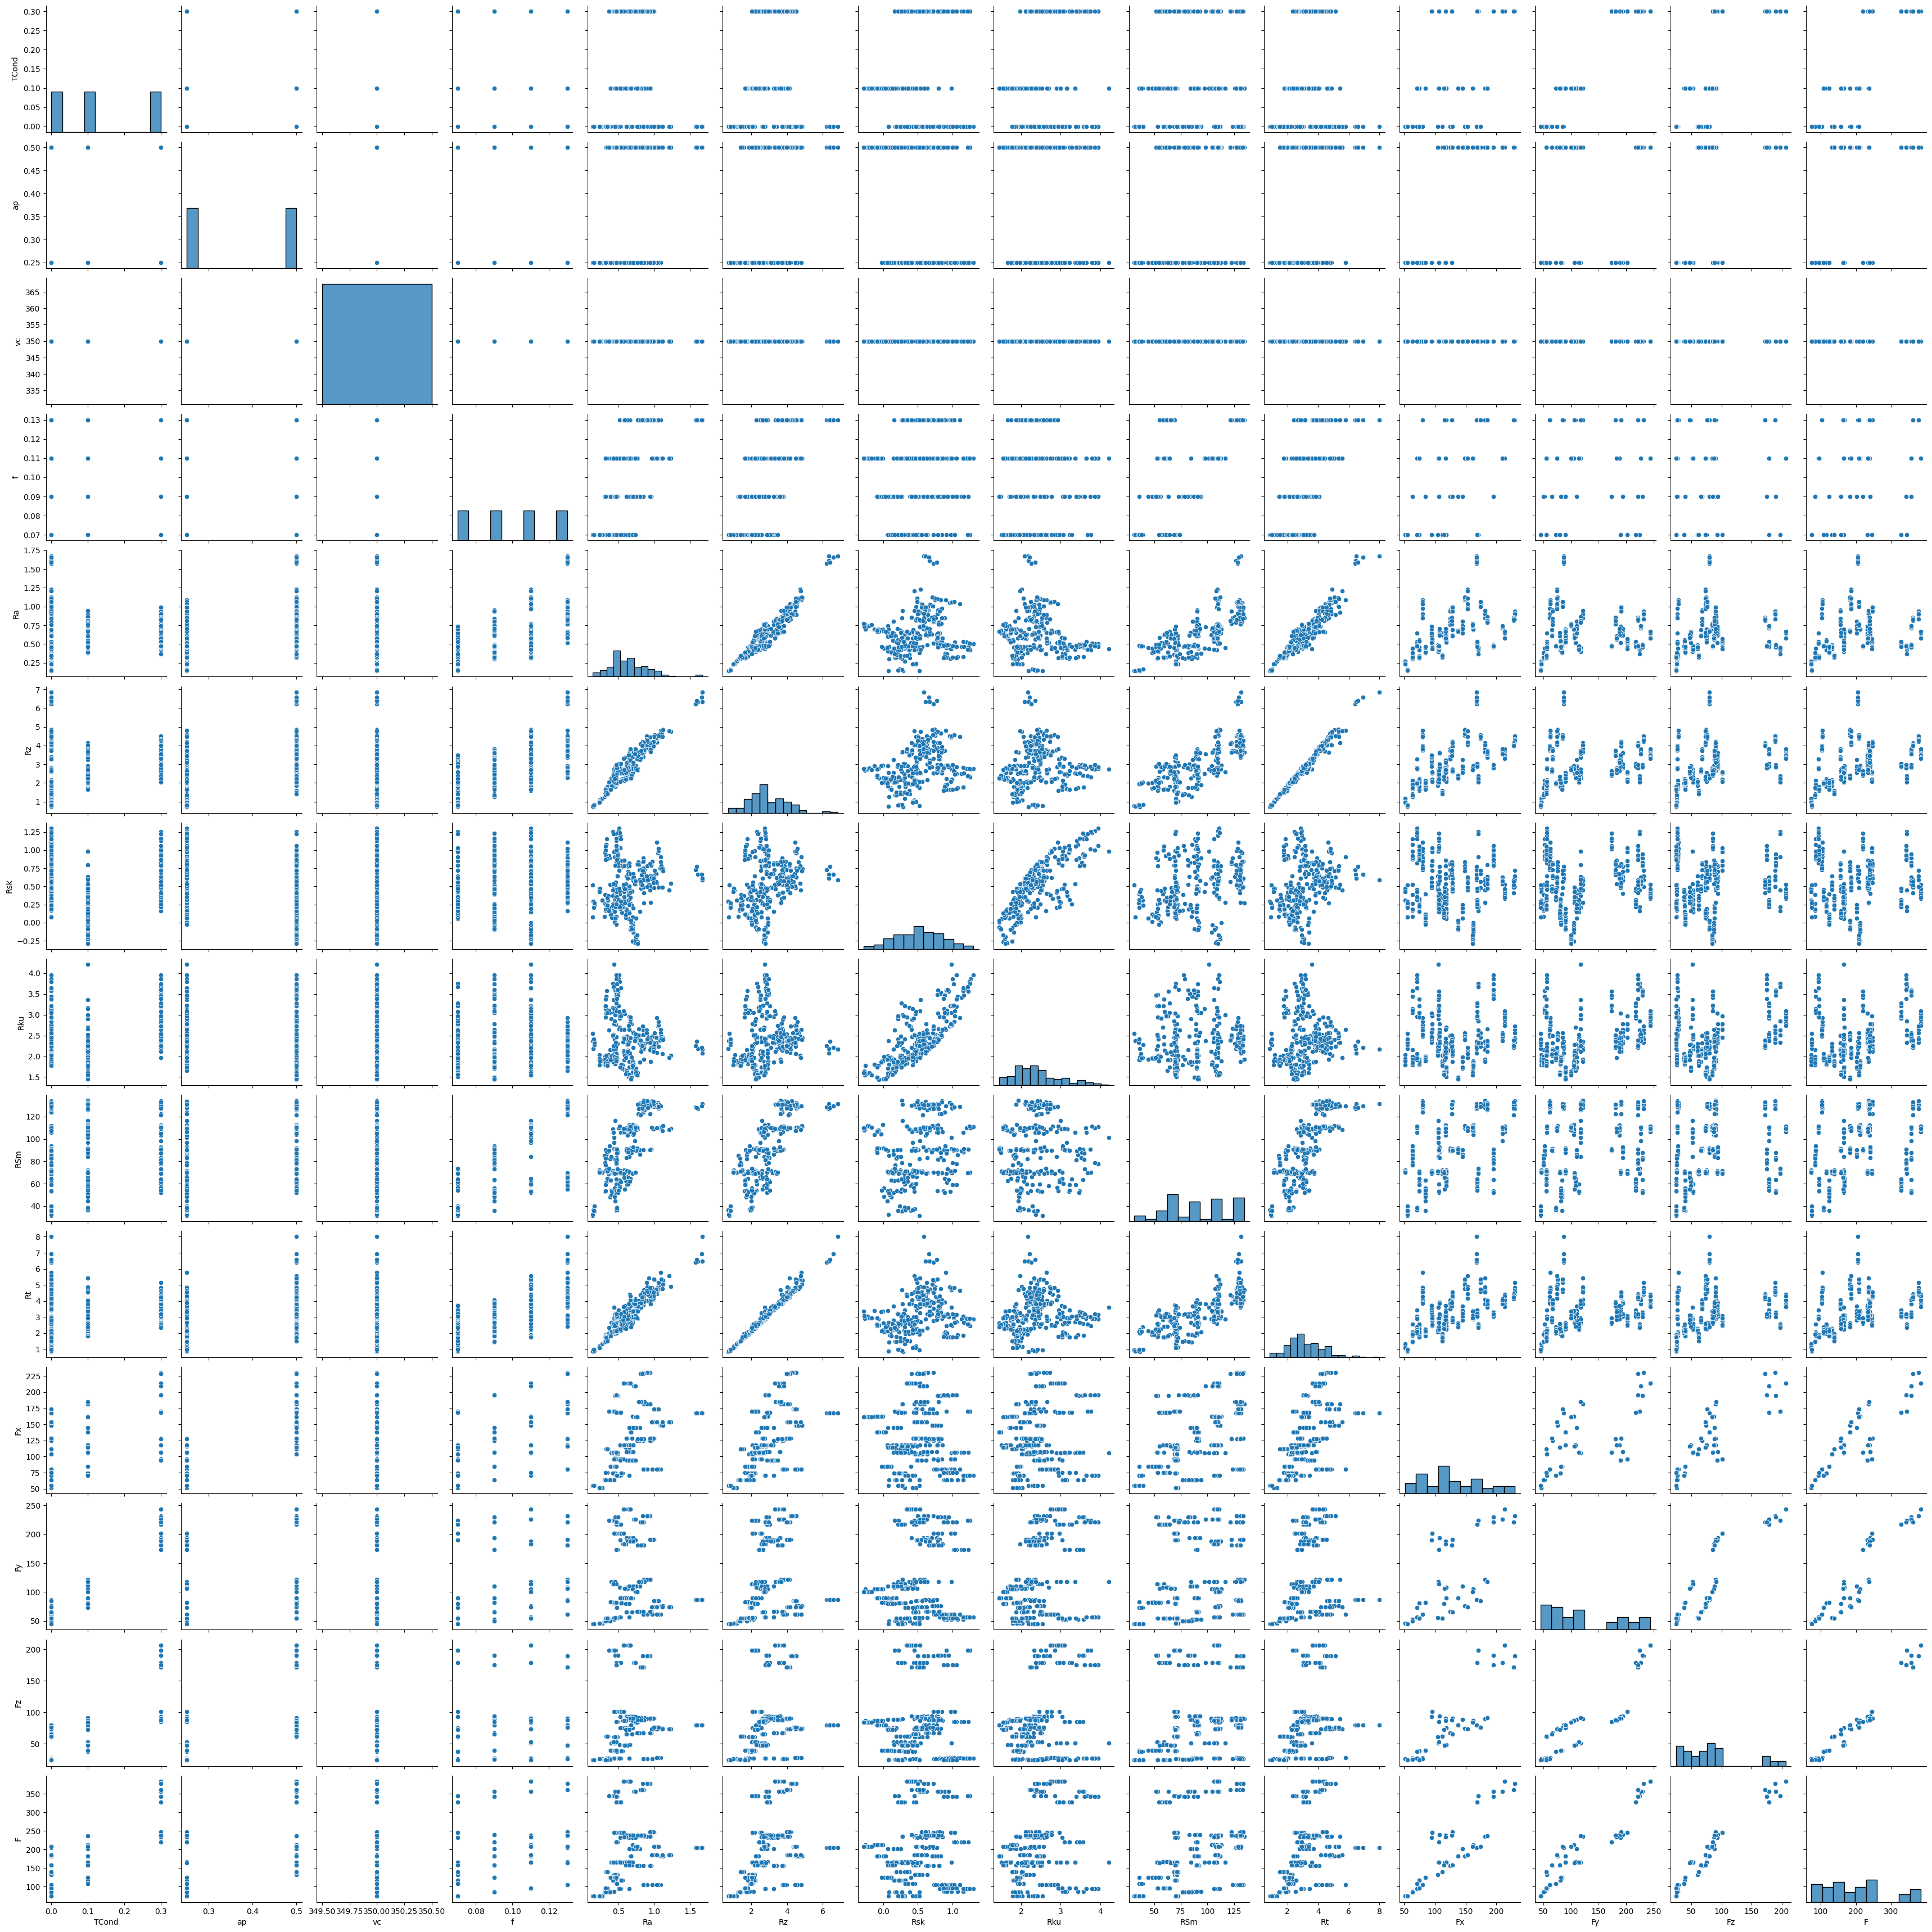

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


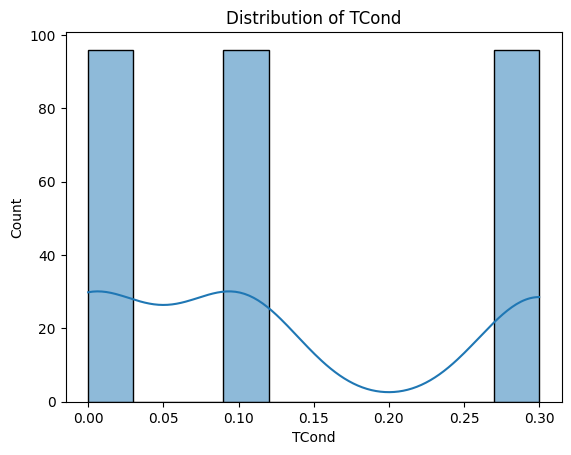

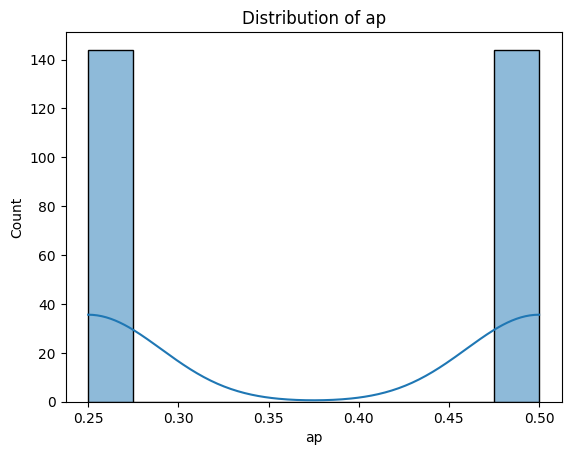

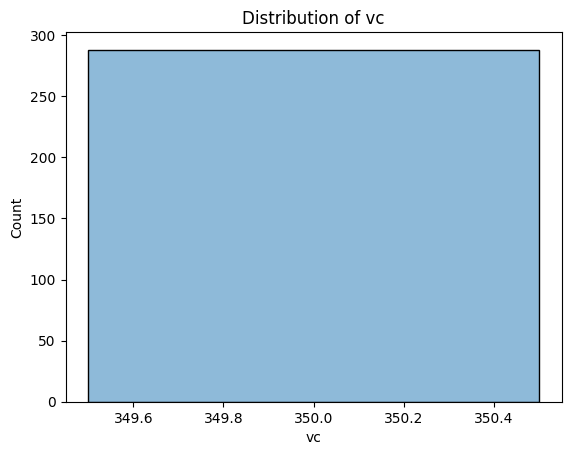

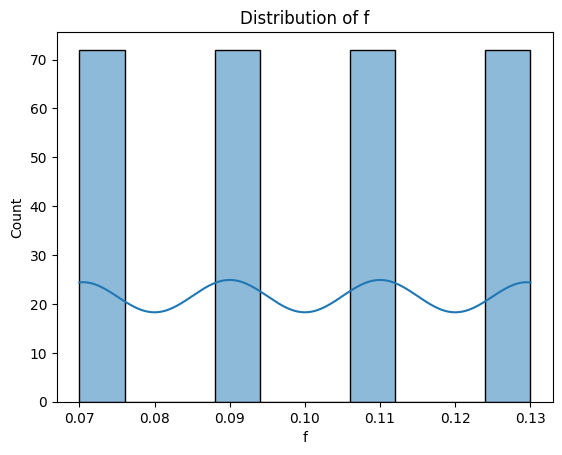

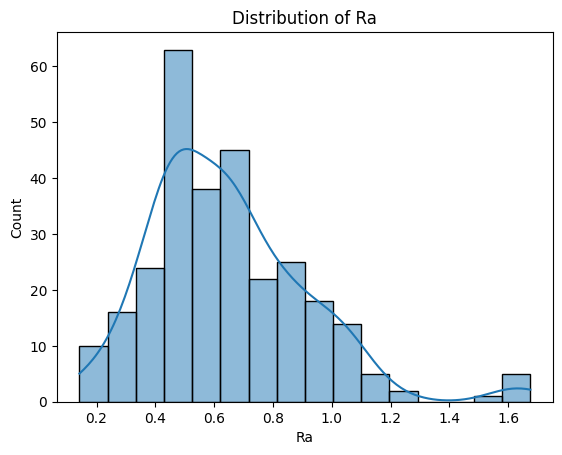

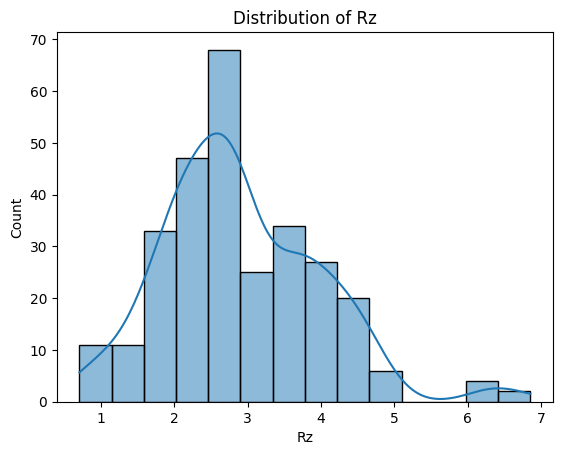

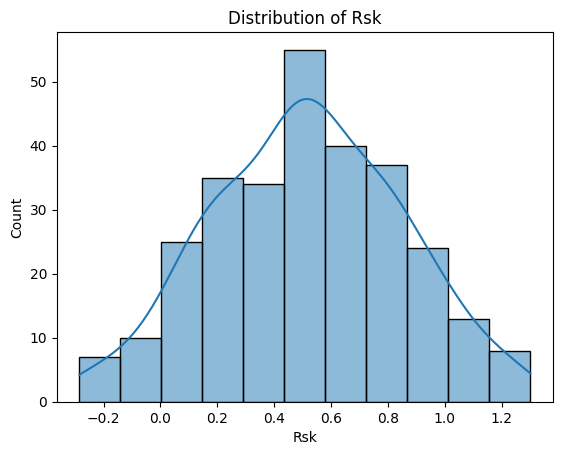

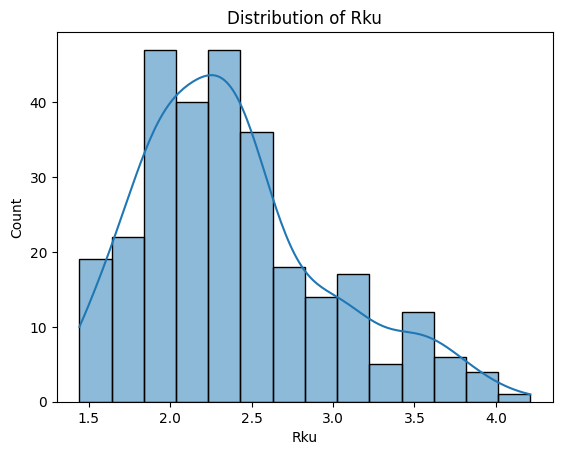

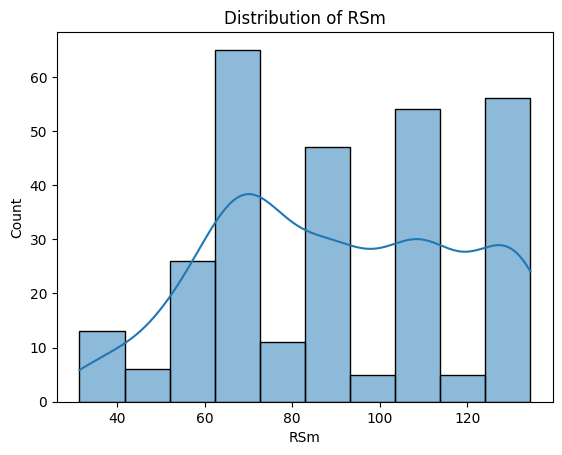

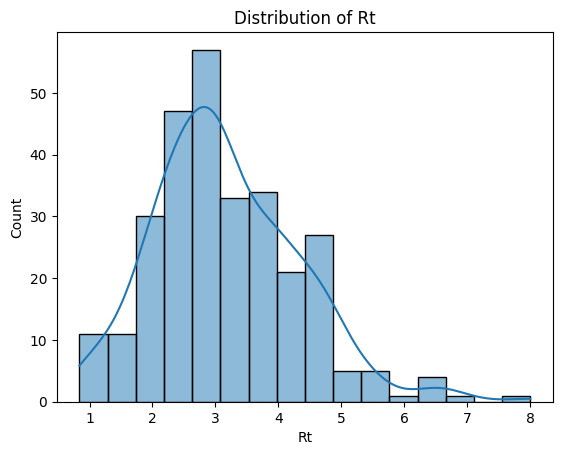

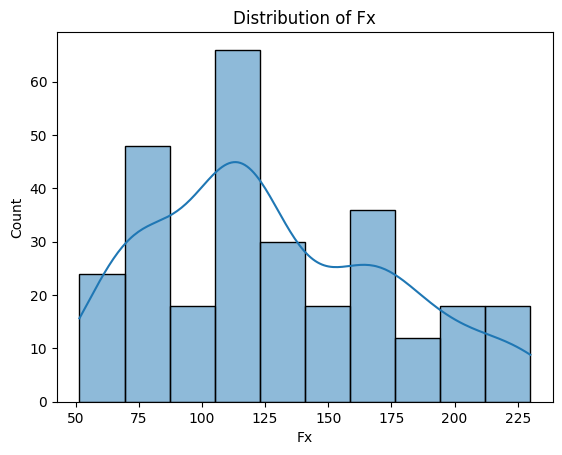

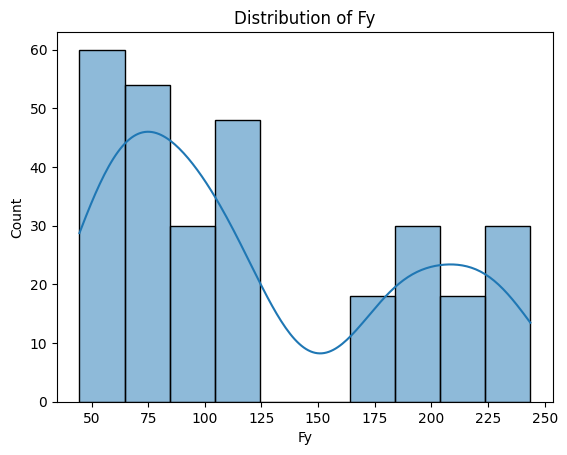

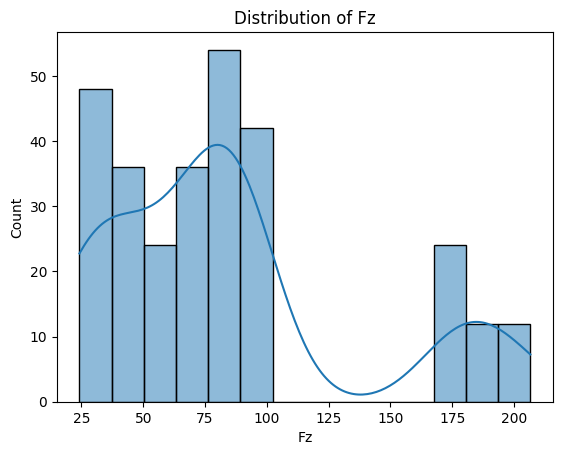

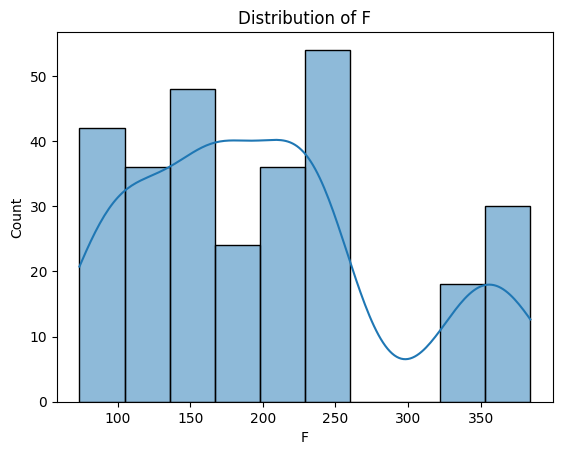

In [30]:
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


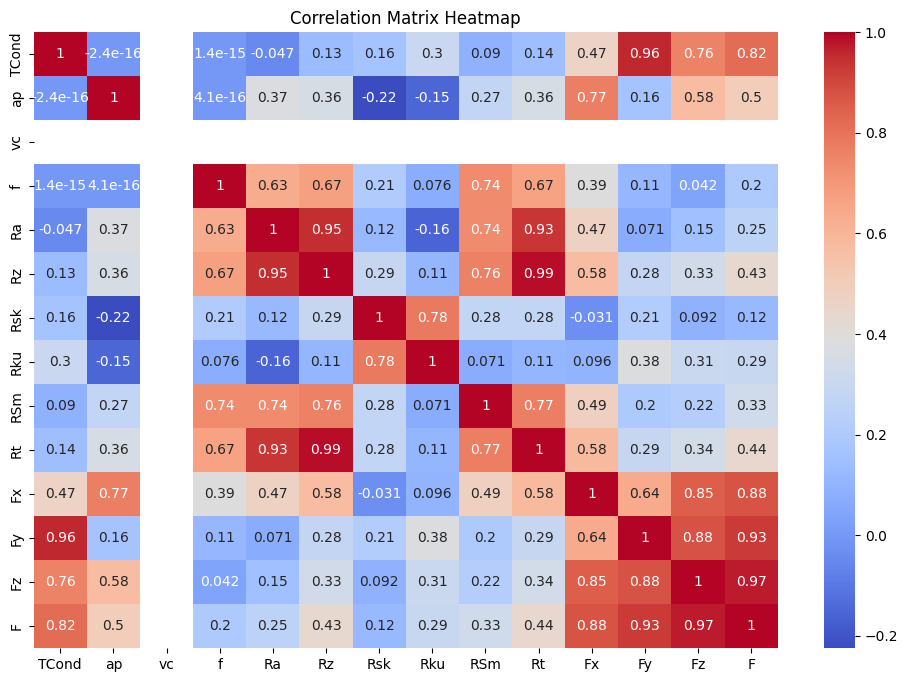

In [32]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
df.drop(columns=["vc"],inplace=True)

In [35]:
df.head()

,TCond,ap,f,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F
0,0.0,0.25,0.13,1.050,4.504,0.959,2.728,132.5,4.864,80.23,61.8,28.33,105.160267
1,0.0,0.25,0.13,1.088,4.791,0.904,2.637,129.7,5.776,80.23,61.8,28.33,105.160267
2,0.0,0.25,0.13,1.056,4.451,0.984,2.741,130.9,4.696,80.23,61.8,28.33,105.160267
3,0.0,0.25,0.13,1.059,4.518,0.990,2.758,127.3,4.802,80.23,61.8,28.33,105.160267
4,0.0,0.25,0.13,1.062,4.578,1.025,2.838,128.3,4.814,80.23,61.8,28.33,105.160267


In [36]:
#one hot encoding
df = pd.get_dummies(df, columns=['TCond','ap'], drop_first=True)
df

,f,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F,TCond_0.1,TCond_0.3,ap_0.5
0,0.13,1.050,4.504,0.959,2.728,132.5,4.864,80.23,61.8,28.33,105.160267,False,False,False
1,0.13,1.088,4.791,0.904,2.637,129.7,5.776,80.23,61.8,28.33,105.160267,False,False,False
2,0.13,1.056,4.451,0.984,2.741,130.9,4.696,80.23,61.8,28.33,105.160267,False,False,False
3,0.13,1.059,4.518,0.990,2.758,127.3,4.802,80.23,61.8,28.33,105.160267,False,False,False
4,0.13,1.062,4.578,1.025,2.838,128.3,4.814,80.23,61.8,28.33,105.160267,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.09,0.488,2.934,0.925,3.603,73.0,3.168,195.10,221.2,174.90,342.904447,False,True,True
284,0.09,0.481,2.872,1.013,3.741,90.8,2.993,195.10,221.2,174.90,342.904447,False,True,True
285,0.09,0.467,2.852,1.060,3.951,77.7,3.156,195.10,221.2,174.90,342.904447,False,True,True
286,0.09,0.481,2.787,0.870,3.386,81.3,3.037,195.10,221.2,174.90,342.904447,False,True,True


In [37]:
from sklearn.model_selection import train_test_split
y = df['Ra']
y

0      1.050
1      1.088
2      1.056
3      1.059
4      1.062
       ...  
283    0.488
284    0.481
285    0.467
286    0.481
287    0.473
Name: Ra, Length: 288, dtype: float64

In [38]:
x=df.drop(columns=['Ra'])
x

,f,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F,TCond_0.1,TCond_0.3,ap_0.5
0,0.13,4.504,0.959,2.728,132.5,4.864,80.23,61.8,28.33,105.160267,False,False,False
1,0.13,4.791,0.904,2.637,129.7,5.776,80.23,61.8,28.33,105.160267,False,False,False
2,0.13,4.451,0.984,2.741,130.9,4.696,80.23,61.8,28.33,105.160267,False,False,False
3,0.13,4.518,0.990,2.758,127.3,4.802,80.23,61.8,28.33,105.160267,False,False,False
4,0.13,4.578,1.025,2.838,128.3,4.814,80.23,61.8,28.33,105.160267,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.09,2.934,0.925,3.603,73.0,3.168,195.10,221.2,174.90,342.904447,False,True,True
284,0.09,2.872,1.013,3.741,90.8,2.993,195.10,221.2,174.90,342.904447,False,True,True
285,0.09,2.852,1.060,3.951,77.7,3.156,195.10,221.2,174.90,342.904447,False,True,True
286,0.09,2.787,0.870,3.386,81.3,3.037,195.10,221.2,174.90,342.904447,False,True,True


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
x_train.shape

(230, 13)

In [41]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [42]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [43]:
model = Sequential()
model.add(Dense(28, activation='relu', input_dim=13))
model.add(Dense(56, activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1,activation='linear'))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 28)             │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 56)             │         1,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14)             │           798 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,829 (11.05 KB)

 Trainable params: 2,829 (11.05 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss='mse', optimizer="Adam", metrics=["mean_absolute_percentage_error"])

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
callback = EarlyStopping(
    monitor = "loss",
    min_delta = 0.00001,
    patience = 10,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False
)

In [49]:
hist = model.fit(x_train_scaled,y_train, epochs=5000, validation_split=0.2, callbacks=callback)

Epoch 1/5000
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.8244 - mean_absolute_percentage_error: 118.6184 - val_loss: 0.8036 - val_mean_absolute_percentage_error: 82.0538
Epoch 2/5000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4449 - mean_absolute_percentage_error: 81.5478 - val_loss: 0.4456 - val_mean_absolute_percentage_error: 65.3461
Epoch 3/5000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2533 - mean_absolute_percentage_error: 74.9264 - val_loss: 0.2599 - val_mean_absolute_percentage_error: 49.9866
Epoch 4/5000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1729 - mean_absolute_percentage_error: 53.4428 - val_loss: 0.1580 - val_mean_absolute_percentage_error: 37.4314
Epoch 5/5000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1022 - mean_absolute_percentage_error: 37.3639 - val_loss: 0.0933 - val_mean_absolute_percentage_error: 29.7820
Epoch 6/5000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0449 - mean_absolute_percentage_error: 28.5181 - val_loss: 0.0502 - val_

In [62]:
y_prob = model.predict(x_test_scaled)
y_prob

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 


array([[0.3104734 ],
       [0.9991318 ],
       [0.8805569 ],
       [0.34708476],
       [0.6737646 ],
       [0.30896246],
       [0.30221447],
       [0.69981253],
       [0.46509305],
       [0.47278816],
       [0.59877336],
       [0.34275228],
       [0.6182018 ],
       [0.8304766 ],
       [1.1417547 ],
       [0.637464  ],
       [1.0811116 ],
       [0.61088514],
       [0.81863725],
       [0.44173315],
       [0.5377986 ],
       [1.0534366 ],
       [0.4714602 ],
       [0.47380152],
       [0.41440728],
       [0.4431665 ],
       [0.45827925],
       [0.6889196 ],
       [0.5070117 ],
       [0.9703497 ],
       [0.41200414],
       [0.6871596 ],
       [0.6734097 ],
       [0.8904905 ],
       [0.73485   ],
       [0.7140828 ],
       [0.4757659 ],
       [0.49171963],
       [0.597102  ],
       [0.6136437 ],
       [0.8299839 ],
       [0.8924678 ],
       [0.5730348 ],
       [0.4776872 ],
       [0.38781562],
       [0.9205289 ],
       [0.24602777],
       [0.854

In [51]:
from keras.callbacks import History

In [53]:
import numpy as np
epochs = np.arange(0,len(hist.history['loss']))

epochs

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156])

In [56]:
hist.history

{'loss': [0.7485249042510986,
  0.38279473781585693,
  0.22924290597438812,
  0.14179085195064545,
  0.0865970253944397,
  0.048784855753183365,
  0.02880915440618992,
  0.019246025010943413,
  0.01597832888364792,
  0.012589551508426666,
  0.009601826779544353,
  0.007386018987745047,
  0.006063278764486313,
  0.0053563774563372135,
  0.004772135056555271,
  0.0042615020647645,
  0.0037049632519483566,
  0.003337119473144412,
  0.0030094003304839134,
  0.0027820058166980743,
  0.0025218045338988304,
  0.0023053165059536695,
  0.0021364872809499502,
  0.0019918852485716343,
  0.0018855361267924309,
  0.0018479569116607308,
  0.001747550442814827,
  0.0016521201469004154,
  0.0015708821592852473,
  0.0015138346934691072,
  0.0014285416109487414,
  0.0013851589756086469,
  0.0013025985099375248,
  0.0012511227978393435,
  0.001251430599950254,
  0.0011947810417041183,
  0.0011659872252494097,
  0.0010785567574203014,
  0.0010422937339171767,
  0.0010067172115668654,
  0.00097664038185030

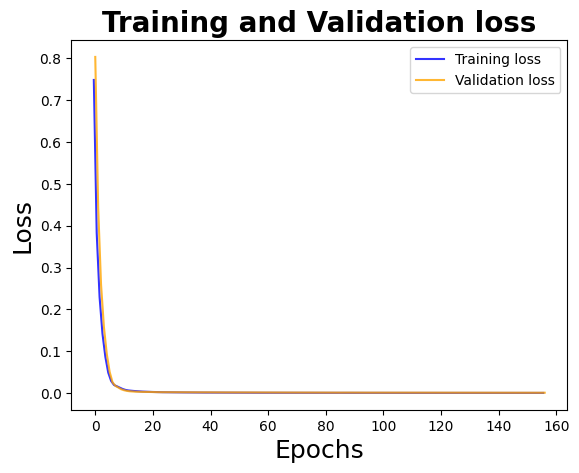

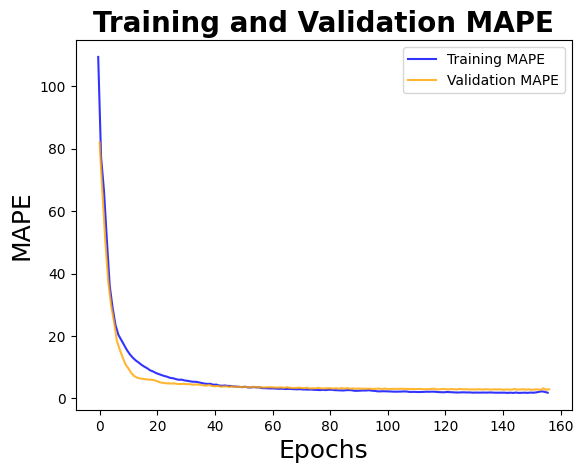

In [55]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(epochs - 0.5, train_loss, color='blue', alpha=0.8, label='Training loss')
plt.plot(epochs, val_loss, color='orange', alpha=0.8, label='Validation loss')
plt.title('Training and Validation loss', size=20, fontweight='bold')
plt.xlabel('Epochs', size=18)
plt.ylabel('Loss', size=18)
plt.legend()
plt.show()

train_mape = hist.history['mean_absolute_percentage_error']
val_mape = hist.history['val_mean_absolute_percentage_error']
plt.plot(epochs - 0.5, train_mape, color='blue', alpha=0.8, label='Training MAPE')
plt.plot(epochs, val_mape, color='orange', alpha=0.8, label='Validation MAPE')
plt.title('Training and Validation MAPE', size=20, fontweight='bold')
plt.xlabel('Epochs', size=18)
plt.ylabel('MAPE', size=18)
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_prob)

0.9712833626262216